# US Post Office Zip Code Data Classification

Author: Marco Sousa 

Last Updated Date: 5/4/2021

The following runs a neural network, convolutional neural network, and K-NN to classify handwritten digits in a quick and concise manner.

If you want more explanatory code that walks your through the process, visit [my digit classification github repository](https://github.com/MarcoRSousa/DigitClassification). Such repository contains a pdf document which details several classification algorithms, along with another jupyter notebook which explains the code more in depth along the way (for the MNIST data similarly).

## Postal Data

### Importing

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd

#Machine Learning libraries
from tensorflow import keras
from tensorflow.keras import layers

#Visualization libraries
import matplotlib.pyplot as plt
#import altair as alt
#import seaborn as sns

#Counter dict class
from collections import Counter

#Machine Learning libraries
from tensorflow import keras
from tensorflow.keras import layers

#In case we only want these in our space
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

### Loading in US Postal Digit Database

In [3]:
train = np.loadtxt('zip.train')
test = np.loadtxt('zip.test')

### Checking shape and data type

In [4]:
train.shape

(7291, 257)

In [5]:
test.shape

(2007, 257)

In [6]:
test.dtype

dtype('float64')

In [7]:
train.dtype

dtype('float64')

### Formatting

Removing the Y labels from the X data; also formatting X to be matrices rather than vectors

In [8]:
#Separating out the Y labels
yTest = test[:,0]
yTrain = train[:,0]

In [9]:
print('yTrain: ' + str(yTrain.shape))
print('yTest: ' + str(yTest.shape))

yTrain: (7291,)
yTest: (2007,)


In [10]:
#Cutting off the labels from front
xTestCut = test[:,1:257]
xTrainCut = train[:,1:257]

In [11]:
print('xTestCut: ' + str(xTestCut.shape))
print('xTrainCut: ' + str(xTrainCut.shape))

xTestCut: (2007, 256)
xTrainCut: (7291, 256)


Reshaping a single image

In [12]:
testImg = xTestCut[0].reshape(16,16)
testImg.shape

(16, 16)

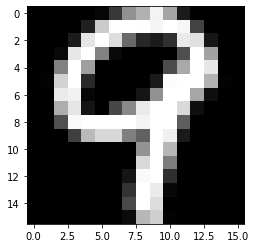

In [13]:
plt.imshow(testImg, cmap=plt.get_cmap('gray'))

Reshaping entire dataset; constructing X data matrices

In [14]:
#Empty zeros in shape (len(data),16,16), will look like [[],[],...,[]] when filled
xTrain = np.zeros((len(xTrainCut),16,16))
xTest = np.zeros((len(xTestCut),16,16))

#Reshaping and storing into numpy array
for i in range(0,len(xTrainCut)):
  xTrain[i] = xTrainCut[i].reshape(16,16)

for i in range(0,len(xTestCut)):
  xTest[i] = xTestCut[i].reshape(16,16)

In [15]:
#Printing finished shapes
print('xTrain: ' + str(xTrain.shape))
print('yTrain: ' + str(yTrain.shape))
print('xTest: ' + str(xTest.shape))
print('yTest: ' + str(yTest.shape))

xTrain: (7291, 16, 16)
yTrain: (7291,)
xTest: (2007, 16, 16)
yTest: (2007,)


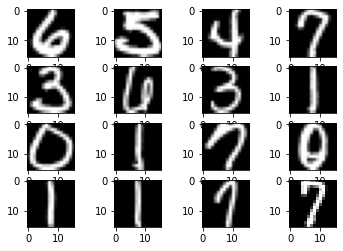

In [16]:
#Visualizing the first 16 xTrain digits in a 4 by 4 grid.
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.imshow(xTrain[i-1], cmap=plt.get_cmap('gray'))

## Neural Network

Preparing the data

In [17]:
# The images exist from [-1,1]. Better to have normalized to [-.5,.5]
xTrain = (xTrain/2)
xTest = (xTest/2)

In [18]:
# Flatten the images. 
# We reversed what we did but NOT for CNN
xTrainFlat = xTrain.reshape((-1, 16*16))
xTestFlat = xTest.reshape((-1, 16*16))
#input = input.flatten()

#printing shape
print(xTrainFlat.shape)
print(xTestFlat.shape)

(7291, 256)
(2007, 256)


Constructing a simple model

In [19]:
#Constructing our layers
model = Sequential([
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [20]:
#Compiling our model with categorical crossentropy loss; adam optimizer
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [21]:
#Training the model with 5 epochs and batching
#to_categorical is important in relation to our last softmax layer.
#In particular, we're feeding an array of integers, when we want an array of VECTORS
#...containing each integer classification
#i.e, [5] will become ~[0 0 0 0 0 1 0 0 0 0]
history = model.fit(
  xTrainFlat, # training data
  to_categorical(yTrain), # training labels
  epochs=15,
  batch_size=8,
  validation_data=(xTestFlat, to_categorical(yTest))
)

Epoch 1/15
912/912 [==============================] - 3s 2ms/step - loss: 0.7434 - accuracy: 0.7782 - val_loss: 0.3258 - val_accuracy: 0.9133
Epoch 2/15
912/912 [==============================] - 2s 2ms/step - loss: 0.1559 - accuracy: 0.9534 - val_loss: 0.2969 - val_accuracy: 0.9233
Epoch 3/15
912/912 [==============================] - 2s 2ms/step - loss: 0.1017 - accuracy: 0.9696 - val_loss: 0.3802 - val_accuracy: 0.9028
Epoch 4/15
912/912 [==============================] - 2s 2ms/step - loss: 0.0923 - accuracy: 0.9699 - val_loss: 0.3070 - val_accuracy: 0.9253
Epoch 5/15
912/912 [==============================] - 2s 2ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.2893 - val_accuracy: 0.9352
Epoch 6/15
912/912 [==============================] - 2s 2ms/step - loss: 0.0510 - accuracy: 0.9829 - val_loss: 0.3094 - val_accuracy: 0.9283
Epoch 7/15
912/912 [==============================] - 2s 2ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.3356 - val_accuracy: 0.9312
Epoch 

In [22]:
#Evaluating the model on the test data (can be seen in validation)
model.evaluate(xTestFlat,to_categorical(yTest))

63/63 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.9317


[0.3958055078983307, 0.9317389130592346]

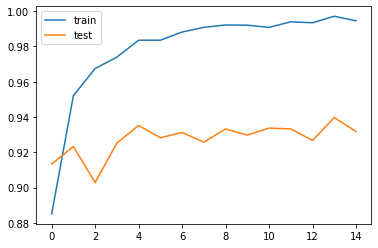

In [23]:
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Convolutional Neural Network

Preparing the data

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (16, 16, 1)

In [25]:
# Make sure images have shape (16, 16, 1)
xTrain = np.expand_dims(xTrain, -1)
xTest = np.expand_dims(xTest, -1)

# convert class vectors to binary class matrices
yTrain = keras.utils.to_categorical(yTrain, num_classes)
yTest = keras.utils.to_categorical(yTest, num_classes)

In [26]:
#Building the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [27]:
#Defining batch size and number of epochs
batch_size = 32
epochs = 25

#compile the model with corss entorpy loss
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Fit the model with batch normalization and validation splitting
history = model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, validation_data=(xTest,yTest))

Epoch 1/25
228/228 [==============================] - 4s 13ms/step - loss: 1.5616 - accuracy: 0.4983 - val_loss: 0.3920 - val_accuracy: 0.8904
Epoch 2/25
228/228 [==============================] - 3s 12ms/step - loss: 0.3835 - accuracy: 0.8872 - val_loss: 0.2945 - val_accuracy: 0.9148
Epoch 3/25
228/228 [==============================] - 3s 12ms/step - loss: 0.2852 - accuracy: 0.9117 - val_loss: 0.2478 - val_accuracy: 0.9317
Epoch 4/25
228/228 [==============================] - 3s 12ms/step - loss: 0.2123 - accuracy: 0.9354 - val_loss: 0.2239 - val_accuracy: 0.9362
Epoch 5/25
228/228 [==============================] - 3s 12ms/step - loss: 0.1792 - accuracy: 0.9471 - val_loss: 0.2059 - val_accuracy: 0.9407
Epoch 6/25
228/228 [==============================] - 3s 12ms/step - loss: 0.1640 - accuracy: 0.9491 - val_loss: 0.1899 - val_accuracy: 0.9452
Epoch 7/25
228/228 [==============================] - 3s 12ms/step - loss: 0.1352 - accuracy: 0.9627 - val_loss: 0.1935 - val_accuracy: 0.9402

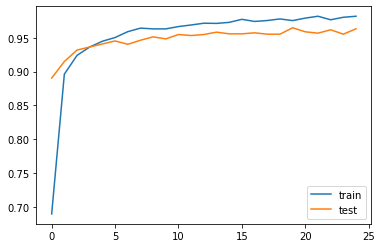

In [28]:
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
#Building the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
#Defining stochastic batch size and number of epochs
batch_size = 1
epochs = 20

#compile the model with corss entorpy loss
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Fit the model with batch normalization and validation splitting
history = model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, validation_data=(xTest,yTest))

Epoch 1/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.9398 - accuracy: 0.6890 - val_loss: 0.2525 - val_accuracy: 0.9278
Epoch 2/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.2413 - accuracy: 0.9247 - val_loss: 0.2124 - val_accuracy: 0.9362
Epoch 3/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.2022 - accuracy: 0.9386 - val_loss: 0.1853 - val_accuracy: 0.9437
Epoch 4/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1830 - accuracy: 0.9432 - val_loss: 0.1694 - val_accuracy: 0.9517
Epoch 5/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1553 - accuracy: 0.9547 - val_loss: 0.1547 - val_accuracy: 0.9547
Epoch 6/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1573 - accuracy: 0.9545 - val_loss: 0.1822 - val_accuracy: 0.9502
Epoch 7/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1475 - accuracy: 0.9564 - val_loss: 0.1550 - val_ac

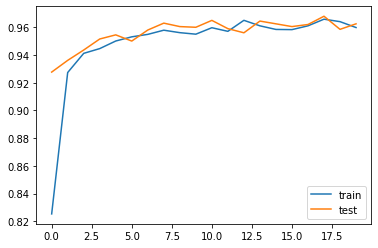

In [ ]:
# learning curves of model accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
xTrain2 = xTrain[:, :, :,0]
xTrain2.shape

(7291, 16, 16)

In [ ]:
xTest2 = xTest[:,:,:,0]
xTest2.shape

(2007, 16, 16)

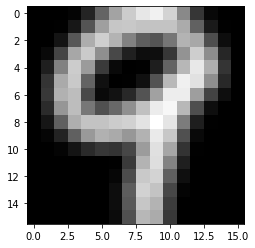

In [ ]:
 blurTest = cv2.GaussianBlur(xTest2[0],(3,3),0)
 plt.imshow(blurTest, cmap=plt.get_cmap('gray'))

In [ ]:
for i in range(len(xTest2)):
  blur = cv2.GaussianBlur(xTest2[i],(3,3),0)
  xTest2[i] = blur

for i in range(len(xTrain2)):
  blur = cv2.GaussianBlur(xTrain2[i],(3,3),0)
  xTrain2[i] = blur

In [ ]:
# Make sure images have shape (16, 16, 1)
xTrain2 = np.expand_dims(xTrain2, -1)
xTest2 = np.expand_dims(xTest2, -1)

In [ ]:
#Building the model; now we input gaussian smoothed data
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
#Defining stochastic batch size and number of epochs
batch_size = 1
epochs = 20

#compile the model with corss entorpy loss
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Fit the model with batch normalization and validation splitting
history = model.fit(xTrain2, yTrain, batch_size=batch_size, epochs=epochs, validation_data=(xTest,yTest))

Epoch 1/20
7291/7291 [==============================] - 16s 2ms/step - loss: 0.8596 - accuracy: 0.7206 - val_loss: 0.2733 - val_accuracy: 0.9223
Epoch 2/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.2485 - accuracy: 0.9249 - val_loss: 0.2076 - val_accuracy: 0.9452
Epoch 3/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1787 - accuracy: 0.9470 - val_loss: 0.1747 - val_accuracy: 0.9507
Epoch 4/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1313 - accuracy: 0.9595 - val_loss: 0.1900 - val_accuracy: 0.9462
Epoch 5/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1358 - accuracy: 0.9582 - val_loss: 0.1771 - val_accuracy: 0.9522
Epoch 6/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1299 - accuracy: 0.9624 - val_loss: 0.1430 - val_accuracy: 0.9611
Epoch 7/20
7291/7291 [==============================] - 15s 2ms/step - loss: 0.1158 - accuracy: 0.9659 - val_loss: 0.1919 - val_ac

## K-Nearest Neighbors

In [ ]:
#Euclidean distance method between images p and q

def euclidean_distance(p, q):
    """
    INPUT: Matrix images p,q
    OUTPUT: Euclidian distance sum ((p-q)**2)
    Note: Be wary of uint8-uint8 due to overflow at negative.
    """
    # element-wise computations are automatically handled by numpy
    return ( np.sqrt(np.sum((p-q)**2)) )

In [ ]:
#Majority K Voting

def findMajority(labels):
    """
    INPUT: list of k labels most similar to that particular image p.
    OUTPUT: The value of the greatest count.
    Dependancy: Requires Counter from collections.
    Note: If there is a tie, it takes the first max value along the dictionary.
    Method Usage: Method for Majority K Voting.
    """
    #Counter to create dictionary and count
    labelDict = Counter(labels)
    
    #Max of the dictionary
    labelMax = max(labelDict.values())
    
    #Iterate through to find key (and majority class)
    for key, value in labelDict.items():
        if value == labelMax:
            return key

In [ ]:
def predictOneDigit(k, trainSet, trainLabels, testDigit):
    """
    INPUT: k nearest neighbors, training set, training labels, test set.
    OUTPUT: Returns a classification based on euclidean distance for a test digit.
    Dependencies: Counter (in majority vote)
    """
    
    #For a single testDigit, compute its euclidean distance versus entire train set
    distances = [euclidean_distance(testDigit,trainSet[i]) for i in range(len(trainSet))]
    
    #Tuple distances array with labels
    tupledDistances = np.array(list(zip(trainLabels,distances)))
    
    #Sort the (this is more expensive than needed)
    sortedDistances = sorted(tupledDistances, key=lambda tup: tup[1])
    
    #Extract out k labels
    kLabels = [label for (label,_) in sortedDistances[:k]]
    
    #Return the classified label by maority vote (size k)
    return (findMajority(kLabels))

Predicting a single digit

In [ ]:
predictOneDigit(5,xTrain,yTrain,xTest[0])

9.0

Predicting for the entire test/train. May take a little time

In [ ]:
predictions = [predictOneDigit(10,xTrain,yTrain,xTest[i]) for i in range(len(xTest))]

Accuracy

In [ ]:
def countBool(lst): 
    return sum(bool(x) for x in lst)

In [ ]:
boolArr = (yTest == predictions)

In [ ]:
accuracy = countBool(boolArr)/ len(boolArr)
accuracy

0.9397110114598903